<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/Imagem_Segmentacao_v_05_maio_13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import zipfile

In [2]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
!pip install mahotas
import Go2BlackWhite
import Go2Mahotas
import mahotas.features.texture as mht
import mahotas.features

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [3]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
#!ls

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Size=500 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

In [0]:
#print(ww[0])

In [0]:
#img = data.astronaut()
#print(img)
img=ww[0]
img = rgb2gray(img)

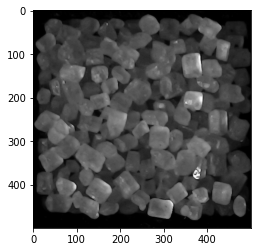

In [9]:
plt.imshow(img, cmap = "gray")

In [10]:
print(img)

[[0 0 0 ... 1 2 1]
 [0 0 0 ... 2 2 1]
 [1 0 1 ... 3 2 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]
 [1 1 0 ... 2 1 1]]


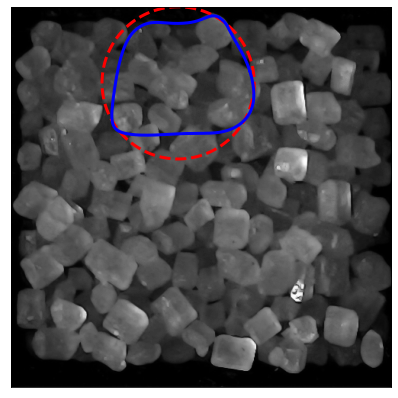

In [11]:

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [0]:
im=img  #
#imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imgray=img
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)


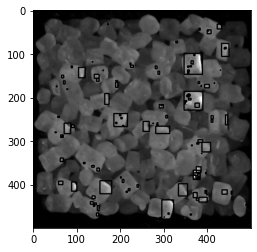

In [13]:
for contour in contours:
  (x,y,w,h) = cv2.boundingRect(contour)
  #cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
  plt.imshow(cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2), cmap = "gray")

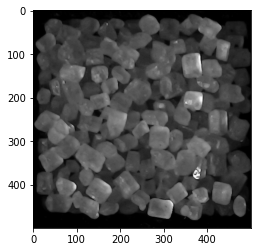

In [15]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.imshow(ww[0], cmap = "gray")